# U.S Power Outage

From the early 2000s to the present day, this analysis unveils the pattern of disruptions and resilience within the nation's power grid. Information on electric disturbance events is collected using Form DOE-417 and published online in an annual summary which was obtained from [Maven Analytics](https://mavenanalytics.io/challenges/maven-power-outage-challenge/28) which was cleaned and prepared [here](https://github.com/srisainee/Power-Outage/blob/main/MavenPowerOutageChallenge.ipynb). 

## Purpose of the report
Electricity outages are a growing concern as we enter an age of unprecedented energy demand and climate disasters. The purpose of this analysis is to test the hypothesis if the changes in climate temperatures in the US, influences the number of power outages occuring in the country.  

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading power data
power = pd.read_csv("power_data(1).csv")
power

,Unnamed: 0,Event Date,Event Type,Restoration,Number of Customers Affected,Area Affected,States,Event Category,Region
0,1,2002-01-30 06:00:00,Ice Storm,2002-02-07 12:00:00,1881134,Oklahoma,Oklahoma,Severe Weather,Southern
1,3,2002-01-29 18:00:00,Ice Storm,NaN,270000,Metropolitan Kansas City Area,Kansas,Severe Weather,MidWest
2,4,2002-01-30 16:00:00,Ice Storm,2002-02-10 21:00:00,95000,Missouri,Missouri,Severe Weather,MidWest
3,6,2002-02-27 10:48:00,Interruption of Firm Load,2002-02-27 11:35:00,255000,California,California,System Operations,West
4,8,2002-03-09 00:00:00,Severe Weather,2002-03-11 12:00:00,190000,Lower Peninsula of Michigan,Michigan,Severe Weather,MidWest
...,...,...,...,...,...,...,...,...,...
5089,4297,2023-06-29 15:42:00,- Weather or natural disaster,NaN,140000,Indiana,Indiana,Severe Weather,MidWest
5090,4298,2023-06-28 11:01:00,- Vandalism - Theft,2023-06-28 11:03:00,0,Georgia,Georgia,Vandalism,Southern
5091,4299,2023-06-22 02:30:00,- Transmission equipment failure,2023-06-22 02:38:00,6242,Louisiana,Louisiana,Transmission Interruption,Southern
5092,4300,2023-06-20 17:48:00,- Transmission equipment failure,2023-06-20 20:52:00,0,Louisiana,Louisiana,Transmission Interruption,Southern


To test the hypothesis, climate data was obtained from [National Centres for Environmental Information](https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/national/time-series/110/tavg/12/0/2002-2024?base_prd=true&begbaseyear=1901&endbaseyear=2000). The data contains the monthly average temperature in Farenheit of the country from 2002 to 2023.

In [12]:
# loading temperature data
temperature = pd.read_csv("data.csv", header=4)
temperature.Date = pd.to_datetime(temperature.Date, format = '%Y%m')
temperature

,Date,Value,Anomaly
0,2002-01-01,53.96,1.94
1,2002-02-01,54.16,2.14
2,2002-03-01,53.99,1.96
3,2002-04-01,54.03,2.00
4,2002-05-01,53.73,1.70
...,...,...,...
260,2023-09-01,53.50,1.47
261,2023-10-01,53.57,1.54
262,2023-11-01,53.85,1.82
263,2023-12-01,54.41,2.39


##### Preparing data for statistical test

The power data is aggregated by month to find the number of events that occured within that month. The date column format is modified to match the climate data. The power and climate data is merged into one. 

In [13]:
power['Date'] = pd.to_datetime(power['Event Date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y%m')
power['Date'] = pd.to_datetime(power['Date'], format = '%Y%m')
power_data = power.groupby(['Date']).agg({'Event Date':'count'}).reset_index()

data = power_data.merge(temperature, on='Date', how='left')
data

,Date,Event Date,Value,Anomaly
0,2002-01-01,3,53.96,1.94
1,2002-02-01,1,54.16,2.14
2,2002-03-01,1,53.99,1.96
3,2002-04-01,1,54.03,2.00
4,2002-07-01,3,53.98,1.95
...,...,...,...,...
248,2023-02-01,39,53.95,1.93
249,2023-03-01,71,53.66,1.63
250,2023-04-01,43,53.72,1.69
251,2023-05-01,28,53.76,1.73


## Does change in temperature affect the number of power outages?

Hypothesis: Climate change indicators, such as changes in average temperatures, are linked to an increase in the frequency of power outages.

To investigate the relationship between the change in climate temperature and the number of power outages, correlation analysis cn be used to assess the strength and direction of the association between these two variables. 

    Null Hypothesis: There is no correlation between climate temperature and the number of power outages.
    Alternative Hypothesis: There is a significant correlation between climate temperature and the number of power outages.
    
The number of outages and average temperature does not follow a linear relationship and has some extreme outliers which violates the assumption of Pearson's Correlation Coefficient. So a non parametric test - Spearmans's Correlation Coefficient will be used to test the hypothesis. 

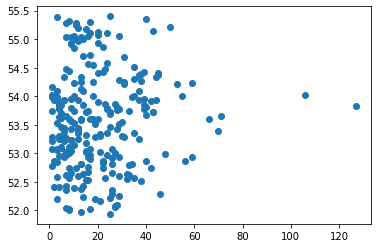

In [14]:
x1 = data['Event Date']
x2 = data['Value']

plt.scatter(x1, x2)

In [15]:
from scipy.stats import spearmanr

corr, _ = spearmanr(x1, x2)
print('Spearman correlation is ' + str(round(corr,3)) )
print('Spearman p value is ' + str(round(_,3)) )

if(_<0.05):
    print("Significant result. Reject null hypothesis")

Spearman correlation is 0.089
Spearman p value is 0.159


The p-value for Spearmans correlation is greater than 0.05 indicating that we fail to reject the null hypothesis. Therefore, there is no correlation between the number of power outages and average tempratures in the U.S. 

Yet, the most common reason for power outage is caused by Severe Weather. If average temperature/climate change does not influence the power outages, could the power outages be happening during certain seasons/months?

## Are events due to severe weather occur during a certain time of the year?

For this hypothesis, the power data will be aggregated monthly to test if certain months have more severe weather related power outages.

The t-test is typically used to compare means between two groups, not multiple groups. In this case, since multiple groups/states are being compared, the t-test becomes less suitable. 

To test this hypothesis, Kruskal-Wallis test can be used to compare the mean frequency of power outages across the different states for severe weather event type. This test is used because each of the 50 states's number of power outages are independent groups and the data is expected to not be normally distributed. So a non parametric test equivalent to ANOVA - Kruskal-Wallis test is used.


    Null Hypothesis: The distributions of power outage frequencies are equal across all states.
    Alternative Hypothesis: At least one state has a different distribution of power outage frequencies.
    

In [37]:
from scipy.stats import kruskal

df = power
df = df[df['Event Category'] == 'Severe Weather']
df = df.groupby(['Month']).agg({'Event Date': 'nunique'}).rename(columns={"Event Date": "Count"}).reset_index()

result = kruskal(*[df['Count'][df['Month'] == month] for month in df['Month'].unique()])

print("Kruskal-Wallis Test Statistic:", result.statistic)
print("P-value:", result.pvalue)

if result.pvalue < 0.05:
    print("Significant result. Reject null hypothesis")

Kruskal-Wallis Test Statistic: 11.0
P-value: 0.4432632784264655
Fail to reject the null hypothesis. There is no significant difference in the distributions.


The p-value of Kruskal-Wallis Test indicates that we fail to reject the null hypothesis. There is no significant difference in the distributions of power outages in certain months of the year. 

If some states are not affected more due to severe weather, could they be affected due to other types of events? 

### Are some event types more likely to occur in certain months of the year?

Since the months and type of events are categorical variables, chi sq test will be used.

In [32]:
df = power
df['Event Date'] = pd.to_datetime(df['Event Date'])
df['Month'] = df['Event Date'].dt.month_name(locale='English')

contingency_table = pd.crosstab(df['Month'], df['Event Category'])
contingency_table

Event Category,Other,Severe Weather,System Operations,Transmission Interruption,Vandalism
Month,,,,,
April,0,209,82,23,108
August,52,280,78,23,103
December,5,187,61,24,115
February,7,310,93,20,104
January,2,212,66,13,115
July,18,237,100,24,100
June,15,278,90,22,92
March,1,191,58,16,119
May,3,133,62,22,117


In [33]:
from scipy.stats import chi2_contingency

observed_data = contingency_table.to_numpy()

chi2, p, _, _ = chi2_contingency(observed_data)

print('Chi-square statistic is ' + str(round(chi2,3)) )
print('Chi-square p value is ' + str(round(p,3)) )

if (p < 0.05):
    print("Significant result. Reject null hypothesis")

Chi-square statistic is 263.984
Chi-square p value is 0.0
Significant result. Reject null hypothesis


The p-value of the chi sq test is less than 0.05 which indicates that there is sufficient evidence to conclude that a relationship exists between the event types and months. Therefore, some months are more likely to have more power outages than other months of the year in the US caused by certain types of events.

If certain months experience a higher frequency of power outages attributed to event types, could specific states be  affected more by certain events types?

 ### Is there a difference in the frequency of power outages caused by differnt event types in different states?
 
To test the hypothesis if some states are more prone to some type of outages, chi sq test will be used to see if there is an a relationship between the event tpe and the state as we are testing the relationship bvetween 2 categorical variables.

In [18]:
df = power

contingency_table = pd.crosstab(df['States'], df['Event Category'])
contingency_table

observed_data = contingency_table.to_numpy()

chi2, p, _, _ = chi2_contingency(observed_data)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if (p < 0.05):
    print("Significant result. Reject null hypothesis")

Chi-square statistic: 1965.7790455222212
P-value: 2.9831060821256067e-252
Significant result. Reject null hypothesis


However, some states have more number of outages than the other. Does that mean power outages are more frequent in certain states? 

To test this hypothesis, Kruskal-Wallis test can be used to compare the mean frequency of power outages across the different states. This test is used because each of the 50 states's number of power outages are independent groups and the data is expected to not be normally distributed. So a non parametric test equivalent to ANOVA - Kruskal-Wallis test is used. 

## Do certain states have frequent power outages than the others?

(array([ 124.,  242.,  318.,  330.,  566.,  505.,  392.,  562., 1026.,
        1029.]),
 array([11716.75      , 12498.92590278, 13281.10180556, 14063.27770833,
        14845.45361111, 15627.62951389, 16409.80541667, 17191.98131944,
        17974.15722222, 18756.333125  , 19538.50902778]),
 <BarContainer object of 10 artists>)

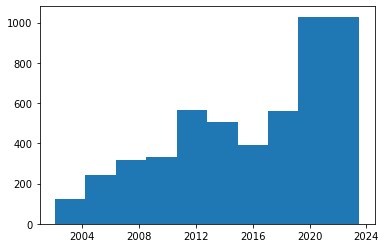

In [5]:
power['Event Date'] = pd.to_datetime(power['Event Date'])
plt.hist(power['Event Date'])

Preparing data for the statistical test

In [7]:
states = power.groupby(['States']).agg({'Event Date': 'nunique'}).rename(columns={"Event Date": "Count"}).reset_index()
states

,States,Count
0,Alabama,88
1,Arizona,45
2,Arkansas,108
3,CFE (Mexico & U.S.),1
4,CSWSUnknownAEP West,1
...,...,...
65,Washington,284
66,West Virginia,54
67,Western Region of Service Territory,3
68,Wisconsin,58


Checking for normally distributed data using histogram and Q-Q plots

(array([31., 22., 11.,  2.,  1.,  1.,  0.,  0.,  1.,  1.]),
 array([  1. ,  49.8,  98.6, 147.4, 196.2, 245. , 293.8, 342.6, 391.4,
        440.2, 489. ]),
 <BarContainer object of 10 artists>)

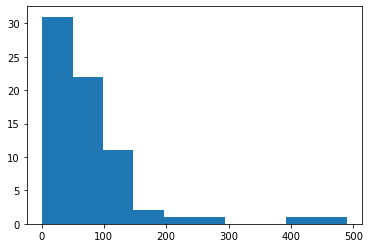

In [8]:
plt.hist(states['Count'])

C:\Users\SriThirumurugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\SriThirumurugan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\SriThirumurugan\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


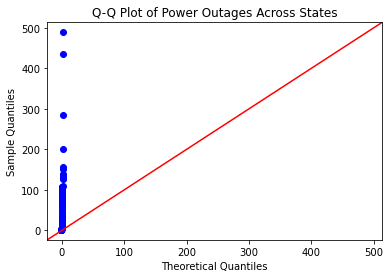

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'outages' is a list/array containing the number of outages for all states
sm.qqplot(states['Count'], line='45')
plt.title('Q-Q Plot of Power Outages Across States')
plt.show()

The histogram and QQ plots show that the data is not normally distributed. Hence Kruskal-Wallis test will be used to test if certain states have higher frequency of power outages than the other.

In [58]:
result = kruskal(*[states['Count'][states['States'] == state] for state in states['States'].unique()])

print("Kruskal-Wallis Test Statistic:", result.statistic)
print("P-value:", result.pvalue)

if result.pvalue < 0.05:
    print("Significant result. Reject null hypothesis")

Kruskal-Wallis Test Statistic: 69.00000000000001
P-value: 0.4773564430497357
Fail to reject the null hypothesis. There is no significant difference in the distributions.


The p-value of the Kruskal-Wallis test indicates that there is not significant difference in the distributions of the power outages as we fail to reject the null hypothesis. This means that even though some states have a high number of power outages, it does not mean they have more frequent power outages. 

It can be concluded that some states more likely to have outages due to certain conditions but some states are not likely to have more power outages than others.